<a href="https://colab.research.google.com/github/santoshkumarvagga/API/blob/main/house_price_ML2_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1306]:
# imports needed for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to supress warnings
import warnings
warnings.filterwarnings('ignore')

In [1307]:
# load dataset into a dataframe
df = pd.read_csv("/content/train.csv", encoding='iso-8859-1')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Lets Perform EDA (Exploratory Data Analysis) first.**

In [1308]:
# lets see the total rows and columns of dataset respectivey
df.shape

(1460, 81)

In [1309]:
# lets see statistical summary of dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1310]:
# lets see the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1311]:
# separate numerical and categorical variables
numeric_vars = df.columns[df.dtypes != 'object']
categorical_vars = df.columns[df.dtypes == 'object']

In [1312]:
# lets see numeric column names
df[numeric_vars]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [1313]:
# lets see categorical column names 
df[categorical_vars]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [1314]:
# lets see the total missing values in each column of type numeric(int and float)
df[numeric_vars].isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
BsmtFinSF1         0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
SalePrice          0
BsmtFullBath       0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
MSSubClass         0
GrLivArea          0
BsmtHalfBath       0
YrSold             0
FullBath           0
MoSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
Id                 0
dtype: int64

In [1315]:
# lets see the percentage wise missing values in each column of type numeric(int and float)
df[numeric_vars].isnull().sum().sort_values(ascending=False)/len(df) * 100

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
BsmtFinSF1        0.000000
LowQualFinSF      0.000000
2ndFlrSF          0.000000
1stFlrSF          0.000000
TotalBsmtSF       0.000000
BsmtUnfSF         0.000000
BsmtFinSF2        0.000000
SalePrice         0.000000
BsmtFullBath      0.000000
YearRemodAdd      0.000000
YearBuilt         0.000000
OverallCond       0.000000
OverallQual       0.000000
LotArea           0.000000
MSSubClass        0.000000
GrLivArea         0.000000
BsmtHalfBath      0.000000
YrSold            0.000000
FullBath          0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
GarageArea        0.000000
GarageCars        0.000000
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
I

In [1316]:
# lets see the total missing values in each column of type categorical('object' type)
df[categorical_vars].isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageCond         81
GarageQual         81
GarageFinish       81
GarageType         81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
BldgType            0
LandContour         0
LotConfig           0
Utilities           0
RoofStyle           0
LotShape            0
Street              0
HouseStyle          0
SaleCondition       0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
Foundation          0
SaleType            0
Heating             0
HeatingQC           0
CentralAir          0
KitchenQual         0
Functional          0
PavedDrive          0
MSZoning            0
dtype: int64

In [1317]:
# lets see the total missing values in each column of type categorical('object' type)
df[categorical_vars].isnull().sum().sort_values(ascending=False)/len(df) * 100

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
GarageCond        5.547945
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtQual          2.534247
BsmtCond          2.534247
MasVnrType        0.547945
Electrical        0.068493
Condition2        0.000000
Condition1        0.000000
Neighborhood      0.000000
LandSlope         0.000000
BldgType          0.000000
LandContour       0.000000
LotConfig         0.000000
Utilities         0.000000
RoofStyle         0.000000
LotShape          0.000000
Street            0.000000
HouseStyle        0.000000
SaleCondition     0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
SaleType          0.000000
Heating           0.000000
H

As we can see, 
* In numerical columns, no columns has a missing value percantage of    greater than 85 % and hence no column dropping.

* In Categorical columns, 3 columns with missing value percentage of greater than 85 % i,e. PoolQC, MiscFeature, Alley have to be dropped.

But, as a treatment to existing missing values, lets see the approach for both numerical and categorical.

In [1318]:
# lets drop 3 columns (PoolQC, MiscFeature, Alley) from dataframe
df = df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1)

In [1319]:
# dataframe now looks like
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [1320]:
# verify number of columns should be less than 3 than before (81)
df.shape

(1460, 78)

In [1321]:
numeric_vars = df.columns[df.dtypes != 'object']
categorical_vars = df.columns[df.dtypes == 'object']

In [1322]:
# lets see the percentage wise missing values in each column of type numeric(int and float)
df[numeric_vars].isnull().sum().sort_values(ascending=False)/len(df) * 100

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
BsmtFinSF1        0.000000
LowQualFinSF      0.000000
2ndFlrSF          0.000000
1stFlrSF          0.000000
TotalBsmtSF       0.000000
BsmtUnfSF         0.000000
BsmtFinSF2        0.000000
SalePrice         0.000000
BsmtFullBath      0.000000
YearRemodAdd      0.000000
YearBuilt         0.000000
OverallCond       0.000000
OverallQual       0.000000
LotArea           0.000000
MSSubClass        0.000000
GrLivArea         0.000000
BsmtHalfBath      0.000000
YrSold            0.000000
FullBath          0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
GarageArea        0.000000
GarageCars        0.000000
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
I

In [1323]:
# lets see the total missing values in each column of type categorical('object' type)
df[categorical_vars].isnull().sum().sort_values(ascending=False)/len(df) * 100

Fence            80.753425
FireplaceQu      47.260274
GarageCond        5.547945
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtQual          2.534247
BsmtFinType1      2.534247
BsmtCond          2.534247
MasVnrType        0.547945
Electrical        0.068493
Condition1        0.000000
Neighborhood      0.000000
Condition2        0.000000
BldgType          0.000000
SaleCondition     0.000000
LotConfig         0.000000
LandSlope         0.000000
RoofStyle         0.000000
Utilities         0.000000
LandContour       0.000000
LotShape          0.000000
Street            0.000000
HouseStyle        0.000000
Foundation        0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
ExterQual         0.000000
ExterCond         0.000000
SaleType          0.000000
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
KitchenQual       0.000000
F

***Missing value treatment for Numeric values ***

NOTE: we will be looking at outliers in each numeric column to deicde what to impute (i,e. imputing with mean if no outliers, else with mean or IQR based on domain context knowledge)


1) Missing value treatment for numeric column "LotFrontage"

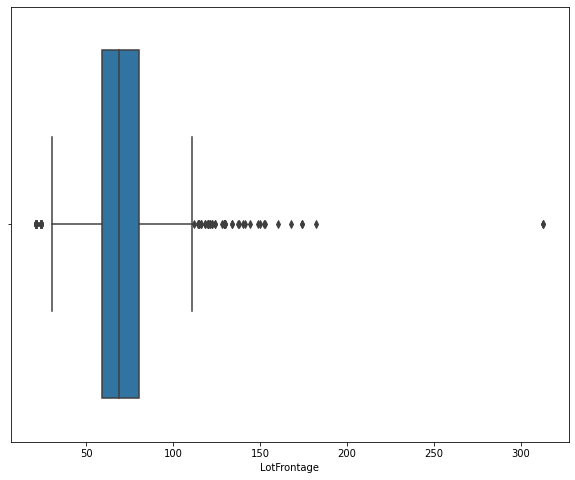

In [1324]:
# lets see outliers in this column
plt.figure(figsize=(10,8))
sns.boxplot(x='LotFrontage', data=df)

The above boxplot clearly tells us the column 'LotFrontage' has Outliers. So lets Impute Missing Values with IQR value.

In [1325]:
# Computing IQR value for the column 'LotFrontage'
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1326]:
# IQR value = 21 i,e.(80-59) for 'LotFrontage Column'. lets impute it in place of missing values
# But, IQR is equal to minimun value in the coulumn, also standard deviation is high for this column(24). Considering 25%, 50% and 75% values and 
# the outliers, We can see imputing with Mean/Medain(since both are close enough 70 and 69 respectively) makes more sense than IQR. 
# So lets impute with MEAN(70.05)

impute_val = 70.05
def func(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['LotFrontage'] = df['LotFrontage'].astype(str)
df['LotFrontage'] = df['LotFrontage'].apply(func)
df['LotFrontage'] = df['LotFrontage'].astype(float)
df['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [1327]:
# lets check for missing values again in 'LotFrontage' column(Supposed to be Zero by now)
df['LotFrontage'].isnull().sum()

0

In similar fashion, Lets perform Missing Value treatment for other numerical columns too.

2) Missing value treatment for numeric column "GarageYrBlt"



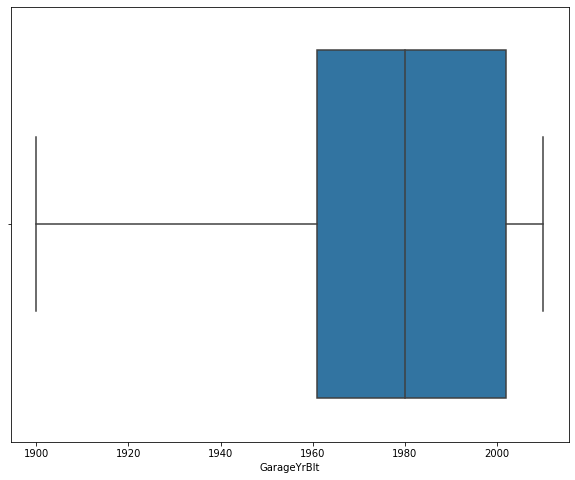

In [1328]:
# check for outliers in this column
plt.figure(figsize=(10,8))
sns.boxplot(x='GarageYrBlt', data=df)

In [1329]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [1330]:
# seems no outliers in this column, hence imputing with mean value (1978.506164)
impute_val = df['GarageYrBlt'].mean()
def func1(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['GarageYrBlt'] = df['GarageYrBlt'].astype(str)
df['GarageYrBlt'] = df['GarageYrBlt'].apply(func1)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(float)

In [1331]:
# check for missing values in "GarageYrBlt" column again (Suppose to be zero)
df['GarageYrBlt'].isnull().sum()

0

Since Year should be an Integer, Converting 'GarageYrBlt' to Integer type


In [1332]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)
df['GarageYrBlt'].head()

0    2003
1    1976
2    2001
3    1998
4    2000
Name: GarageYrBlt, dtype: int64

3) Missing value treatment for numeric column "MasVnrArea"

In [1333]:
df['MasVnrArea'].value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

By analysing Data dictionary, 'MasVnrArea' value = 0.0 is valid(not treates as missing) for 'MasVnrType' = None. Hence, we treat only 'NA' as Missing values in this 'MasVnrArea' column.



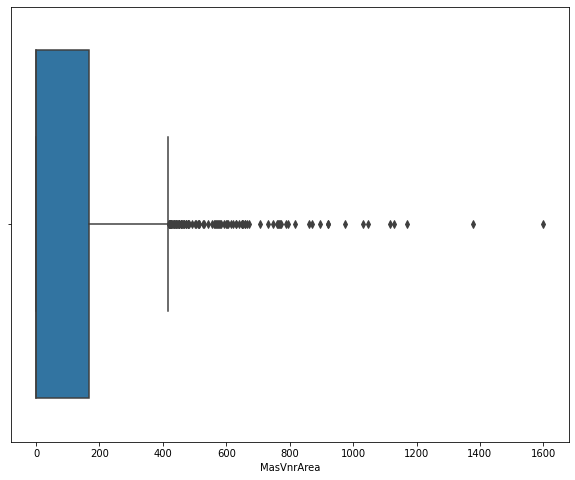

In [1334]:
# check for outliers in this column
plt.figure(figsize=(10,8))
sns.boxplot(x='MasVnrArea', data=df)

In [1335]:
# seems outliers are huge in this column, looking at below stats, imputing with IQR does not make sense since 25% (Q1) is zero.
# So, imputing with Mean
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [1336]:
impute_val = df['MasVnrArea'].mean()
def func2(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['MasVnrArea']= df['MasVnrArea'].astype(str)
df['MasVnrArea'] = df['MasVnrArea'].apply(func2)
df['MasVnrArea'] = df['MasVnrArea'].astype(float)
df['MasVnrArea'].head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

Converting type to Integer for column "MasVnrArea" since all values in dataset are of Integer type

In [1337]:
df['MasVnrArea'] = df['MasVnrArea'].astype('int')
df['MasVnrArea'].isnull().sum() # suppose to be zero by now

0

**Missing Value treatment for Categorical Variables**

Fence            80.753425
FireplaceQu      47.260274
GarageCond        5.547945
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtQual          2.534247
BsmtCond          2.534247
MasVnrType        0.547945
Electrical        0.068493








AS we know, We impute  by Mode (most frequently occuring value) in case of Categorical Variables.

1) Imputing for categorical Variable "Fence"

By Data description, NA values in Fence column mean No fence for the house. It cannot be treated as a Missing value and hence cannot impute by mode value of the column.

At any cost, during predictions we need these rows saying no fence for arriving at valid insights, hence we keep this information in a different manner, other than NA.

In [1338]:
df['Fence'].describe()

count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object

In [1339]:
impute_val = str('No_fence')
def func3(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['Fence'] = df['Fence'].astype(str)
df['Fence'] = df['Fence'].apply(func3)

df['Fence'].isnull().sum() # suppose to be zero

0

In [1340]:
df['Fence'].value_counts()

No_fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

2) Imputing for categorical column "FireplaceQu"

In [1341]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1342]:
impute_val = str('No_fireplace')
def func4(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['FireplaceQu'] = df['FireplaceQu'].astype(str)
df['FireplaceQu'] = df['FireplaceQu'].apply(func4)
df['FireplaceQu'].isnull().sum() # supposed to be zero by now

0

In [1343]:
df['FireplaceQu'].value_counts()

No_fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [1344]:
df['FireplaceQu'].head()

0    No_fireplace
1              TA
2              TA
3              Gd
4              TA
Name: FireplaceQu, dtype: object

3) Imputing value for categorical variable "GarageCond"

In [1345]:
impute_val = str('No Garage')
def func5(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['GarageCond']= df['GarageCond'].astype(str)
df['GarageCond'] = df['GarageCond'].apply(func5)
df['GarageCond'].isnull().sum() # suppose to be zero by now

0

In [1346]:
df['GarageCond'].value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [1347]:
df['GarageCond'].head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageCond, dtype: object

4) Imputing for categorical variable "GarageQual"

In [1348]:
impute_val = str('No Garage')
def func6(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['GarageQual']= df['GarageQual'].astype(str)
df['GarageQual']= df['GarageQual'].apply(func6)
df['GarageQual'].isnull().sum()

0

In [1349]:
df['GarageQual'].value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64

In [1350]:
df['GarageQual'].head()

0    TA
1    TA
2    TA
3    TA
4    TA
Name: GarageQual, dtype: object

5) Imputing for the categorical variable "GarageFinish"

In [1351]:
impute_val = str('No Garage')
def func6(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['GarageFinish']= df['GarageFinish'].astype(str)
df['GarageFinish']= df['GarageFinish'].apply(func6)
df['GarageFinish'].isnull().sum()

0

In [1352]:
df['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64

In [1353]:
df['GarageFinish'].head()

0    RFn
1    RFn
2    RFn
3    Unf
4    RFn
Name: GarageFinish, dtype: object

6) Imputing for the categorical variable "GarageType"


In [1354]:
impute_val = str('No Garage')
def func6(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['GarageType']= df['GarageType'].astype(str)
df['GarageType']= df['GarageType'].apply(func6)
df['GarageType'].isnull().sum()

0

In [1355]:
df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [1356]:
df['GarageType'].head()

0    Attchd
1    Attchd
2    Attchd
3    Detchd
4    Attchd
Name: GarageType, dtype: object

7) Imputing for the categorical variable "BsmtFinType2"

In [1357]:
impute_val = str('No type2 Basement finish')
def func6(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['BsmtFinType2']= df['BsmtFinType2'].astype(str)
df['BsmtFinType2']= df['BsmtFinType2'].apply(func6)
df['BsmtFinType2'].isnull().sum()

0

In [1358]:
df['BsmtFinType2'].value_counts()

Unf                         1256
Rec                           54
LwQ                           46
No type2 Basement finish      38
BLQ                           33
ALQ                           19
GLQ                           14
Name: BsmtFinType2, dtype: int64

In [1359]:
df['BsmtFinType2'].head()

0    Unf
1    Unf
2    Unf
3    Unf
4    Unf
Name: BsmtFinType2, dtype: object

8) Imputing for the categorical varaible "BsmtExposure"


In [1360]:
impute_val = str('No Basement')
def func6(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['BsmtExposure']= df['BsmtExposure'].astype(str)
df['BsmtExposure']= df['BsmtExposure'].apply(func6)
df['BsmtExposure'].isnull().sum()

0

In [1361]:
df['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [1362]:
df['BsmtExposure'].head()

0    No
1    Gd
2    Mn
3    No
4    Av
Name: BsmtExposure, dtype: object

9) Imputing for the categorical varaible "BsmtFinType1"


In [1363]:
impute_val = str('No Basement')
def func6(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['BsmtFinType1']= df['BsmtFinType1'].astype(str)
df['BsmtFinType1']= df['BsmtFinType1'].apply(func6)
df['BsmtFinType1'].isnull().sum()

0

In [1364]:
df['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [1365]:
df['BsmtFinType1'].head()

0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object

10) Imputing for the categorical varaible "BsmtCond"

In [1366]:
impute_val = str('No Basement')
def func6(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['BsmtCond']= df['BsmtCond'].astype(str)
df['BsmtCond']= df['BsmtCond'].apply(func6)
df['BsmtCond'].isnull().sum()

0

In [1367]:
df['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [1368]:
df['BsmtCond'].head()

0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object

11)  Imputing for the categorical varaible "MasVnrType"

By analysing Data Dictionary and dataset for this column, NA here refers to Missing Value, hence needs to be imputed by Mean.

In [1369]:
df['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [1370]:
impute_val = str(df['MasVnrType'].mode())
def func7(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['MasVnrType']= df['MasVnrType'].astype(str)
df['MasVnrType']= df['MasVnrType'].apply(func7)
df['MasVnrType'].isnull().sum()

0

In [1371]:
df['MasVnrType'].value_counts()

None                        864
BrkFace                     445
Stone                       128
BrkCmn                       15
0    None\ndtype: object      8
Name: MasVnrType, dtype: int64

In [1372]:
df['MasVnrType'].head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

12) Imputing for the categorical varaible "Electrical"

By analysing Data Dictionary and dataset for this column, NA here refers to Missing Value, hence needs to be imputed by Mean.

In [1373]:
impute_val = str(df['Electrical'].mode())
def func7(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['Electrical']= df['Electrical'].astype(str)
df['Electrical']= df['Electrical'].apply(func7)
df['Electrical'].isnull().sum()

0

In [1374]:
df['Electrical'].value_counts()

SBrkr                        1334
FuseA                          94
FuseF                          27
FuseP                           3
0    SBrkr\ndtype: object       1
Mix                             1
Name: Electrical, dtype: int64

In [1375]:
df['Electrical'].head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

13) Imputing for the categorical variable "BsmtQual"


By analysing Data Dictionary, here NA does not refer to Missing values, hence imputing by string "No Basement" to preserve the information.

In [1376]:
impute_val = str('No Basement')
def func8(x):
  if x == 'nan':
    return impute_val
  else:
    return x

df['BsmtQual']= df['BsmtQual'].astype(str)
df['BsmtQual']= df['BsmtQual'].apply(func8)
df['BsmtQual'].isnull().sum()

0

In [1377]:
df['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [1378]:
df['BsmtQual'].head()

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object

In [1379]:
# lets see the percentage wise missing values in each column of type numeric(int and float)
df[numeric_vars].isnull().sum().sort_values(ascending=False)/len(df) * 100

SalePrice        0.0
BsmtFinSF1       0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
TotalBsmtSF      0.0
BsmtUnfSF        0.0
BsmtFinSF2       0.0
MasVnrArea       0.0
YrSold           0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
LotArea          0.0
LotFrontage      0.0
MSSubClass       0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
GarageArea       0.0
GarageCars       0.0
GarageYrBlt      0.0
Fireplaces       0.0
TotRmsAbvGrd     0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
Id               0.0
dtype: float64

In [1380]:
# lets see the total missing values in each column of type categorical('object' type)
df[categorical_vars].isnull().sum().sort_values(ascending=False)/len(df) * 100

SaleCondition    0.0
SaleType         0.0
ExterQual        0.0
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofMatl         0.0
RoofStyle        0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig        0.0
Utilities        0.0
LandContour      0.0
LotShape         0.0
Street           0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
Functional       0.0
Fence            0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageFinish     0.0
GarageType       0.0
FireplaceQu      0.0
KitchenQual      0.0
BsmtCond         0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
BsmtFinType2     0.0
BsmtFinType1     0.0
BsmtExposure     0.0
MSZoning         0.0
dtype: float64

Now, All the Missing values are being treated. and the types of each column have been verified with the Data Dictionary, which is good to go ahead.

**Feature Selection using Regularization**